# About dataset
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\stroke prediction\healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Pathway
* data discription
* changing data types of features
* Exploratory Data Analysis
* Modelling

#### Data discription

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.shape

(5110, 12)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [7]:
data.stroke.value_counts()/len(data)*100 #highly imbalance dataset

0    95.127202
1     4.872798
Name: stroke, dtype: float64

#### changing the datatype of features

In [8]:
data['hypertension']=data['hypertension'].astype(object)
data['heart_disease']=data['heart_disease'].astype(object)


### Exploratory data analysis

#### Univariate analysis

In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
num_col=data.select_dtypes(include=np.number).columns
num_col=['age', 'avg_glucose_level', 'bmi']

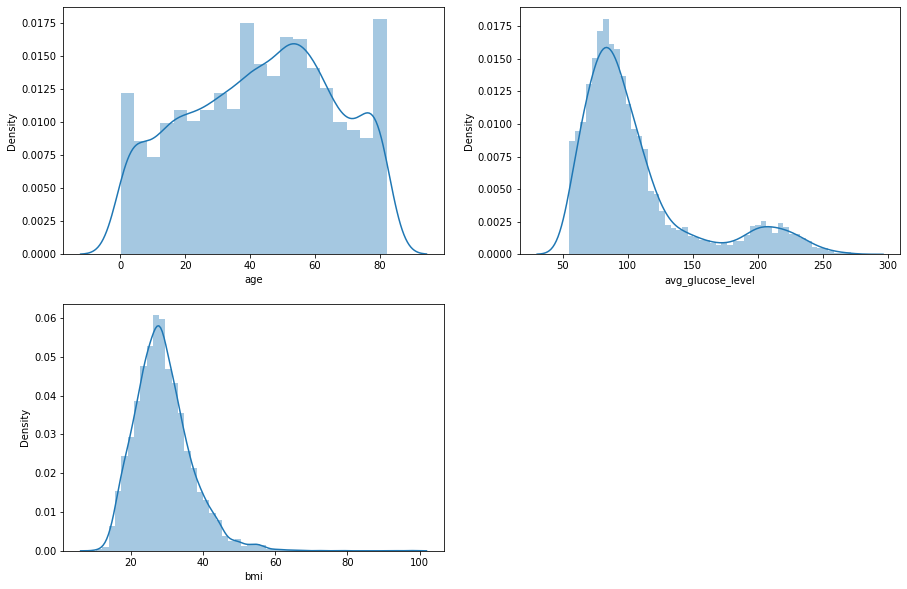

In [11]:
t=1
plt.figure(figsize=[15,10])
for i in num_col:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t=t+1
plt.show()

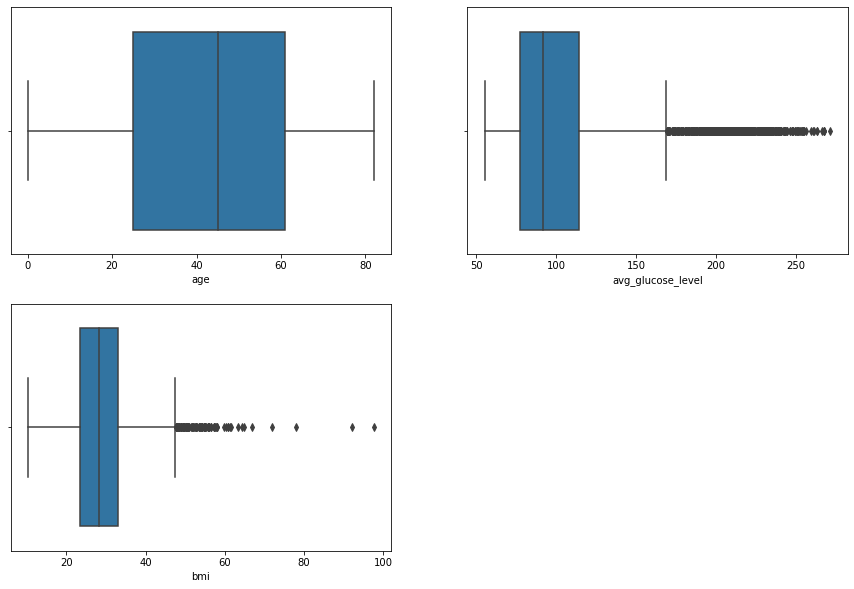

In [12]:
t=1
plt.figure(figsize=[15,10])
for i in num_col:
    plt.subplot(2,2,t)
    sns.boxplot(data[i])
    t=t+1
plt.show()

#### inference of numerical columns
* majority of patients age lie between 24-62
* huge outliers lie in avg glucose level which is possible case
* majority of patients bmi between 24 to 33


In [13]:
cat_col=data.select_dtypes(include=np.object).columns
cat_col

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

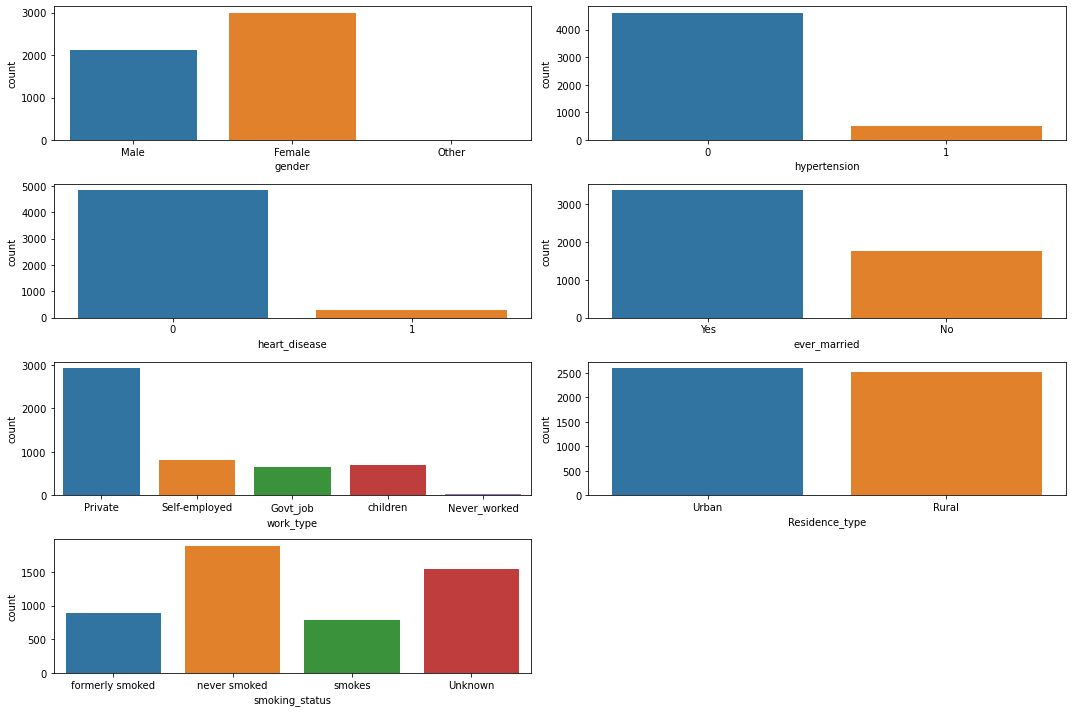

In [14]:
t=1
plt.figure(figsize=[15,10])
for i in cat_col:
    plt.subplot(4,2,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

#### inference of cat columns
* female patients is higher
* majority patients dont have hypertension
* majority patients dont have heart disease 
* married person is higher
* most of patients engage in private job
* unkown category in smoking needs to be imputed

In [15]:
#####

In [16]:
### bivariate analysis

In [17]:
####

### Missing value treatment

In [18]:
data.isnull().sum()/len(data)*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [19]:
data.bmi.median()

28.1

In [20]:
data.groupby('gender')['bmi'].median()

gender
Female    27.8
Male      28.4
Other     22.4
Name: bmi, dtype: float64

In [21]:
data.loc[(data.bmi.isnull())&(data['gender']=='Female'),'bmi']=27.8
data.loc[(data.bmi.isnull())&(data['gender']=='Male'),'bmi']=28.4


In [22]:
data.loc[data.gender=='Other','gender']='Female'

In [23]:
data.loc[data.work_type=='Never_worked','work_type']='Private'

In [24]:
data.work_type.value_counts()


Private          2947
Self-employed     819
children          687
Govt_job          657
Name: work_type, dtype: int64

### Encoding

In [25]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,0,1,1,1,0,0,1,1,0,0
1,61.0,202.21,27.8,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,1,0,1,1,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,0,0,1,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,1,0,1,0,0,0,1,0


In [26]:
data.shape

(5110, 15)

## Modeling 

### 1) Base model

In [27]:
X=data.drop('stroke',axis=1)
y=data.stroke

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [30]:
import statsmodels.api as sma
x_train=sma.add_constant(x_train)
x_test=sma.add_constant(x_test)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4088, 15)
(4088,)
(1022, 15)
(1022,)


In [32]:
x_train

,const,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
117,1.0,74.0,72.96,31.3,1,0,0,1,1,0,0,1,0,0,1
4777,1.0,79.0,69.34,29.0,1,0,0,1,1,0,0,0,0,1,0
4772,1.0,18.0,97.65,21.5,0,0,0,0,1,0,0,1,0,0,0
199,1.0,74.0,74.96,26.6,0,0,0,1,0,1,0,1,0,1,0
672,1.0,17.0,67.81,55.7,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,1.0,36.0,66.55,32.8,0,0,0,0,1,0,0,0,0,0,1
4101,1.0,61.0,93.97,39.4,0,0,0,1,1,0,0,0,0,0,0
2580,1.0,39.0,121.32,26.8,1,0,0,1,1,0,0,0,0,1,0
1532,1.0,59.0,79.18,52.8,0,0,0,1,1,0,0,0,1,0,0


In [33]:
model=sma.Logit(y_train,x_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.155899
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4088
Model:                          Logit   Df Residuals:                     4073
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.1989
Time:                        00:48:57   Log-Likelihood:                -637.31
converged:                       True   LL-Null:                       -795.55
Covariance Type:            nonrobust   LLR p-value:                 4.287e-59
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.7427      0.669    -11.575      0.000      -9.054      -6.432
age                                0.0713      0.006     11.207      0.000       0.059       0.084
avg_glucose_level                  0.0036      0.001      2.675      0.007       0.001       0.006
bmi                                0.0050      0.012      0.407      0.684      -0.019       0.029
gender_Male                        0.0388      0.158      0.246      0.806      -0.270       0.348
hypertension_1                     0.4336      0.184      2.361      0.018       0.074       0.793
heart_disease_1                    0.3305      0.213      1.552      0.121      -0.087       0.748
ever_married_Yes                  -0.2617      0.242     -1.083      0.279      -0.735       0.212
work_type_Private                  0.1285      0.231      0.555      0.579      -0.325       0.582
work_type_Self-employed           -0.2309      0.263     -0.878      0.380      -0.747       0.285
work_type_children                 0.3911      1.112      0.352      0.725      -1.788       2.571
Residence_type_Urban               0.0732      0.155      0.473      0.636      -0.230       0.377
smoking_status_formerly smoked     0.2374      0.240      0.989      0.323      -0.233       0.708
smoking_status_never smoked        0.0806      0.227      0.356      0.722      -0.363       0.525
smoking_status_smokes              0.3241      0.266      1.217      0.224      -0.198       0.846
==================================================================================================
"""

In [34]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_train_os,y_train_os=s.fit_resample(x_train,y_train)


In [35]:
model=sma.Logit(y_train_os,x_train_os).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.323797
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 7778
Model:                          Logit   Df Residuals:                     7763
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.5329
Time:                        00:48:57   Log-Likelihood:                -2518.5
converged:                       True   LL-Null:                       -5391.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.2930      0.257    -12.800      0.000      -3.797      -2.789
age                                0.0951      0.003     33.199      0.000       0.089       0.101
avg_glucose_level                  0.0059      0.001      8.598      0.000       0.005       0.007
bmi                                0.0171      0.006      2.883      0.004       0.005       0.029
gender_Male                       -0.8401      0.078    -10.804      0.000      -0.993      -0.688
hypertension_1                    -0.5867      0.119     -4.950      0.000      -0.819      -0.354
heart_disease_1                   -0.8515      0.156     -5.452      0.000      -1.158      -0.545
ever_married_Yes                  -0.4943      0.101     -4.881      0.000      -0.693      -0.296
work_type_Private                 -1.3567      0.085    -16.033      0.000      -1.523      -1.191
work_type_Self-employed           -2.4835      0.119    -20.907      0.000      -2.716      -2.251
work_type_children                -3.8636      1.016     -3.802      0.000      -5.855      -1.872
Residence_type_Urban              -0.8447      0.074    -11.463      0.000      -0.989      -0.700
smoking_status_formerly smoked    -2.1483      0.106    -20.183      0.000      -2.357      -1.940
smoking_status_never smoked       -2.1808      0.089    -24.606      0.000      -2.354      -2.007
smoking_status_smokes             -2.2382      0.129    -17.396      0.000      -2.490      -1.986
==================================================================================================
"""

In [36]:
y_train_os.value_counts()

1    3889
0    3889
Name: stroke, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,accuracy_score,recall_score

In [38]:
def score(acu,pred):
    print('confusion_matrix \n',confusion_matrix(acu,pred))
    print('cohen_kappa_score ',cohen_kappa_score(acu,pred))
    print('accuracy_score ',accuracy_score(acu,pred))
    print('recall_score ',recall_score(acu,pred))
    print('classification_report \n',classification_report(acu,pred))

In [39]:
y_pred_prob=model.predict(x_test)

In [40]:
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]
score(y_test,y_pred)

confusion_matrix 
 [[855 117]
 [ 27  23]]
cohen_kappa_score  0.18321678321678314
accuracy_score  0.8590998043052838
recall_score  0.46
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       972
           1       0.16      0.46      0.24        50

    accuracy                           0.86      1022
   macro avg       0.57      0.67      0.58      1022
weighted avg       0.93      0.86      0.89      1022



### 2)Knn

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_os,y_train_os)
y_pred_knn=knn.predict(x_test)
print(score(y_test,y_pred_knn))

confusion_matrix 
 [[781 191]
 [ 24  26]]
cohen_kappa_score  0.12518811660442553
accuracy_score  0.7896281800391389
recall_score  0.52
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.12      0.52      0.19        50

    accuracy                           0.79      1022
   macro avg       0.55      0.66      0.54      1022
weighted avg       0.93      0.79      0.85      1022

None


### 3) Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_os,y_train_os)
y_pred_nb=nb.predict(x_test)
print(score(y_test,y_pred_nb))

confusion_matrix 
 [[563 409]
 [ 10  40]]
cohen_kappa_score  0.07925552272952074
accuracy_score  0.5900195694716243
recall_score  0.8
classification_report 
               precision    recall  f1-score   support

           0       0.98      0.58      0.73       972
           1       0.09      0.80      0.16        50

    accuracy                           0.59      1022
   macro avg       0.54      0.69      0.44      1022
weighted avg       0.94      0.59      0.70      1022

None


### 4) Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_os,y_train_os)
y_pred_dt=dt.predict(x_test)
print(score(y_test,y_pred_dt))

confusion_matrix 
 [[887  85]
 [ 40  10]]
cohen_kappa_score  0.07888095753118474
accuracy_score  0.8776908023483366
recall_score  0.2
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.11      0.20      0.14        50

    accuracy                           0.88      1022
   macro avg       0.53      0.56      0.54      1022
weighted avg       0.92      0.88      0.90      1022

None


In [50]:
from sklearn.model_selection import GridSearchCV
param={'max_depth':[7,8,9,10,11,12],'max_features':[12,13,14],'criterion':['entropy']}
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,scoring='f1',cv=3,verbose=3)
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=entropy, max_depth=7, max_features=12;, score=0.841 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=7, max_features=12;, score=0.873 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=7, max_features=12;, score=0.874 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=7, max_features=13;, score=0.843 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=7, max_features=13;, score=0.891 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=7, max_features=13;, score=0.892 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=7, max_features=14;, score=0.847 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=7, max_features=14;, score=0.885 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=7, max_features=14;, score=0.870 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=8, max_features=12;, score=0.856 total time=   0.0s

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [7, 8, 9, 10, 11, 12],
                         'max_features': [12, 13, 14]},
             scoring='f1', verbose=3)

In [51]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 13}

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**gscv.best_params_)
dt.fit(x_train_os,y_train_os)
y_pred_dt=dt.predict(x_test)
print(score(y_test,y_pred_dt))

confusion_matrix 
 [[862 110]
 [ 33  17]]
cohen_kappa_score  0.13108672128613397
accuracy_score  0.860078277886497
recall_score  0.34
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.13      0.34      0.19        50

    accuracy                           0.86      1022
   macro avg       0.55      0.61      0.56      1022
weighted avg       0.92      0.86      0.89      1022

None


### 5) random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train_os,y_train_os)
y_pred_rf=rf.predict(x_test)
print(score(y_test,y_pred_rf))

confusion_matrix 
 [[924  48]
 [ 46   4]]
cohen_kappa_score  0.030047251726505464
accuracy_score  0.9080234833659491
recall_score  0.08
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.08      0.08      0.08        50

    accuracy                           0.91      1022
   macro avg       0.51      0.52      0.52      1022
weighted avg       0.91      0.91      0.91      1022

None


In [55]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[400,600,700,1000,1200],'max_depth':[4,5,6,7,8],'criterion':['entropy']}
gscv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,scoring='f1',cv=3,verbose=3)
gscv.fit(x_train_os,y_train_os)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=400;, score=0.825 total time=   1.2s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=400;, score=0.849 total time=   1.0s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=400;, score=0.837 total time=   1.0s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.824 total time=   1.6s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.847 total time=   1.6s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=600;, score=0.840 total time=   2.8s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.823 total time=   1.9s
[CV 2/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.850 total time=   1.9s
[CV 3/3] END criterion=entropy, max_depth=4, n_estimators=700;, score=0.839 total time=   1.8s
[CV 1/3] END criterion=entropy, max_depth=4, n_estimators=1000;, score=0.824 total t

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [400, 600, 700, 1000, 1200]},
             scoring='f1', verbose=3)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(**gscv.best_params_)
rf.fit(x_train_os,y_train_os)
y_pred_rf=rf.predict(x_test)
print(score(y_test,y_pred_rf))

confusion_matrix 
 [[871 101]
 [ 28  22]]
cohen_kappa_score  0.1985824225256222
accuracy_score  0.8737769080234834
recall_score  0.44
classification_report 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       972
           1       0.18      0.44      0.25        50

    accuracy                           0.87      1022
   macro avg       0.57      0.67      0.59      1022
weighted avg       0.93      0.87      0.90      1022

None


In [58]:
y_test.value_counts()

0    972
1     50
Name: stroke, dtype: int64

### 6) XGboost

In [61]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=200,max_depth=5)
xgb.fit(x_train_os,y_train_os)
y_pred_xgb=xgb.predict(x_test)
print(score(y_test,y_pred_xgb))

confusion_matrix 
 [[930  42]
 [ 41   9]]
cohen_kappa_score  0.13550477976396735
accuracy_score  0.9187866927592955
recall_score  0.18
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.18      0.18      0.18        50

    accuracy                           0.92      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022

None
